Dataset from https://www.kaggle.com/snap/amazon-fine-food-reviews

In [1]:
# Data Imports
import numpy as np
import pandas as pd

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
import lightgbm as lgb

# For evaluating our ML results
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,roc_auc_score

In [2]:
# Making the Confusion Matrix
def confusion_matrix_c(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    class_label = ["Negative", "Positive"]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm, annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
def plot_roc_auc_curve(fpr, tpr):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [3]:
df = pd.read_csv('Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.dropna(inplace=True)
df[df['Score'] != 3]
df['Positive'] = np.where(df['Score'] > 3, 1, 0)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Positive
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1


In [5]:
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Positive'], random_state = 42)

## Count Vectorizer For Text

In [6]:
vect = CountVectorizer(min_df = 5, ngram_range = (1,2)).fit(X_train)
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [7]:
print(vect.get_feature_names()[::2000])

['00', '15535', '27 and', '55 seconds', 'about excessive', 'across recipes', 'addictive eat', 'after buying', 'ah but', 'all tricks', 'also calorie', 'always spills', 'amazon whenever', 'and alternate', 'and experienced', 'and odor', 'and sulfites', 'answer and', 'anything spectacular', 'are approximately', 'are triangular', 'as afraid', 'as two', 'ate one', 'awful chemical', 'bacon treat', 'balance canned', 'bases and', 'be me', 'became spoiled', 'been tainted', 'bella bean', 'better day', 'binding', 'bland for', 'bold didn', 'bottle version', 'boy to', 'br our', 'brands to', 'brie on', 'bulk again', 'but nice', 'buying folgers', 'cake without', 'can fit', 'cans left', 'carries my', 'caught on', 'challenge is', 'cheesecake was', 'child these', 'chocolate prices', 'citrizen and', 'clusters for', 'coffee recommended', 'combining to', 'completely filled', 'consistency all', 'continuing', 'cool thing', 'count will', 'crazy she', 'crunch value', 'cups week', 'dark milk', 'deb', 'deidrich',

In [8]:
X_train_vector = vect.transform(X_train)
X_test_vector = vect.transform(X_test)

## Logistic Regression¶

In [9]:
# Fitting Logistic Regression to the Training set
lr = LogisticRegression()
lr.fit(X_train_vector, y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
y_pred_lr = lr.predict(X_test_vector)

In [11]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87     30894
           1       0.96      0.97      0.96    111209

   micro avg       0.94      0.94      0.94    142103
   macro avg       0.93      0.91      0.92    142103
weighted avg       0.94      0.94      0.94    142103



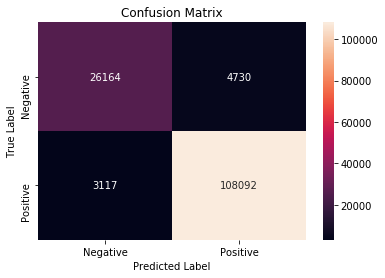

In [12]:
confusion_matrix_c(y_test, y_pred_lr)

In [13]:
#Score of Prediction
lr_score_train = lr.score(X_train_vector,y_train)
print("Train Prediction Score",lr_score_train*100)
lr_score_test = accuracy_score(y_test,y_pred_lr)
print("Test Prediction Score",lr_score_test*100)

Train Prediction Score 98.60546834682906
Test Prediction Score 94.47794909326333


In [14]:
print('AUC: ', roc_auc_score(y_test, y_pred_lr))

AUC:  0.9094337651589738


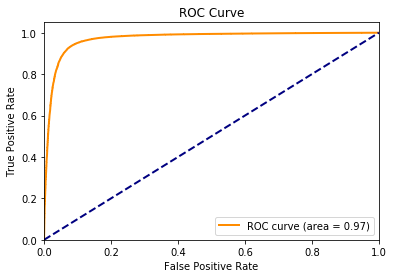

In [15]:
y_predict_probabilities = lr.predict_proba(X_test_vector)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)
plot_roc_auc_curve(fpr, tpr)

In [16]:
feature_names = np.array(vect.get_feature_names())
sorted_coef_index = lr.coef_[0].argsort()
print('Smallest Coef: \n{}\n'.format(feature_names[sorted_coef_index][:10]))
print('Largest Coef: \n{}\n'.format(feature_names[sorted_coef_index][:-11:-1]))

Smallest Coef: 
['three stars' 'two stars' 'not worth' 'not recommend' 'disappointment'
 'disappointing' 'not happy' 'worst' 'terrible' 'no thanks']

Largest Coef: 
['not disappointed' 'four stars' 'be disappointed' 'hooked' 'not bitter'
 'you won' 'just right' 'love this' 'delicious' 'love it']



### Test 

In [17]:
print(lr.predict(vect.transform(['The movie is not that good, I would never it again','The movie is not bad, I will see it again'])))

[0 1]


## K-Nearest Neighbour¶

In [18]:
# Fitting KNN to the Training set
knn = KNeighborsClassifier()
knn.fit(X_train_vector,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [19]:
# Predicting the Test set results
y_pred_knn= lr.predict(X_test_vector)

In [20]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87     30894
           1       0.96      0.97      0.96    111209

   micro avg       0.94      0.94      0.94    142103
   macro avg       0.93      0.91      0.92    142103
weighted avg       0.94      0.94      0.94    142103



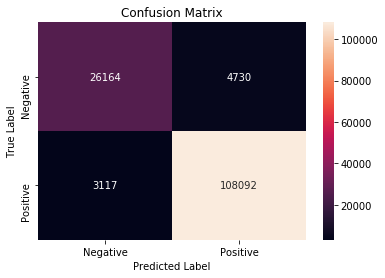

In [21]:
# Confusion Matrix
confusion_matrix_c(y_test, y_pred_knn)

In [22]:
#Score of Prediction
knn_score_train = knn.score(X_train_vector,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction Score",knn_score_test*100)

Train Prediction Score 87.7058370943074
Test Prediction Score 94.47794909326333


In [23]:
print('AUC: ', roc_auc_score(y_test, y_pred_knn))

AUC:  0.9094337651589738


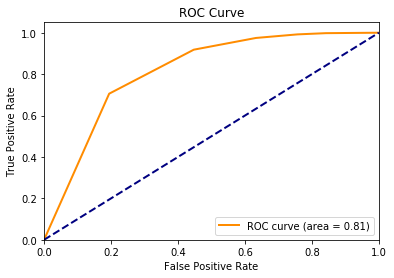

In [24]:
y_predict_probabilities = knn.predict_proba(X_test_vector)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)
plot_roc_auc_curve(fpr, tpr)

### Test 

In [26]:
print(knn.predict(vect.transform(['The movie is not that good, I would never it again','The movie is not bad, I will see it again'])))

[1 1]


## Support Vector Machine

In [19]:
# Fitting SVM to the Training set
svc = SGDClassifier(loss = 'hinge',random_state = 42)
svc_clf = CalibratedClassifierCV(svc, cv=5, method='sigmoid')
svc_clf.fit(X_train_vector, y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, 

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
            cv=5, method='sigmoid')

In [20]:
# Predicting the Test set results
y_pred_svc= svc_clf.predict(X_test_vector)

In [21]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84     30894
           1       0.94      0.98      0.96    111209

   micro avg       0.93      0.93      0.93    142103
   macro avg       0.92      0.88      0.90    142103
weighted avg       0.93      0.93      0.93    142103



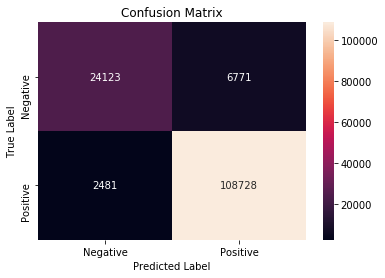

In [22]:
# Confusion Matrix
confusion_matrix_c(y_test, y_pred_svc)

In [23]:
#Score of Prediction
svc_score_train = svc_clf.score(X_train_vector,y_train)
print("Train Prediction Score",svc_score_train*100)
svc_score_test = accuracy_score(y_test,y_pred_svc)
print("Test Prediction Score",svc_score_test*100)

Train Prediction Score 95.86378862231064
Test Prediction Score 93.4892296432869


In [24]:
print('AUC: ', roc_auc_score(y_test, y_pred_svc))

AUC:  0.8792609419491406


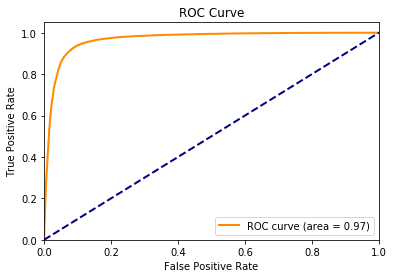

In [25]:
y_predict_probabilities = svc_clf.predict_proba(X_test_vector)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)
plot_roc_auc_curve(fpr, tpr)

### Test 

In [30]:
print(svc_clf.predict(vect.transform(['The movie is not that good, I would never it again','The movie is not bad, I will see it again'])))

[0 1]


## LGBM 

In [13]:
# Fitting LGBM to the Training set
X_train_vector = X_train_vector.astype('float32')
X_test_vector = X_test_vector.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

lgbmc = lgb.LGBMClassifier(random_state=42)
lgbmc.fit(X_train_vector,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [14]:
# Predicting the Test set results
y_pred_lgbmc= lgbmc.predict(X_test_vector)

In [15]:
print(classification_report(y_test,y_pred_lgbmc))

              precision    recall  f1-score   support

         0.0       0.84      0.59      0.69     30894
         1.0       0.89      0.97      0.93    111209

   micro avg       0.89      0.89      0.89    142103
   macro avg       0.87      0.78      0.81    142103
weighted avg       0.88      0.89      0.88    142103



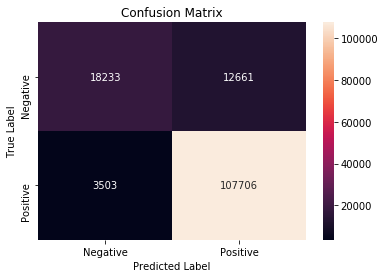

In [16]:
# Confusion Matrix
confusion_matrix_c(y_test, y_pred_lgbmc)

In [18]:
#Score of Prediction
lgbmc_score_train = lgbmc.score(X_train_vector,y_train)
print("Train Prediction Score",lgbmc_score_train*100)
lgbmc_score_test = accuracy_score(y_test,y_pred_lgbmc)
print("Test Prediction Score",lgbmc_score_test*100)

Train Prediction Score 88.71285549414976
Test Prediction Score 88.62515217834951


In [19]:
print('AUC: ', roc_auc_score(y_test, y_pred_lgbmc))

AUC:  0.7793400368421857


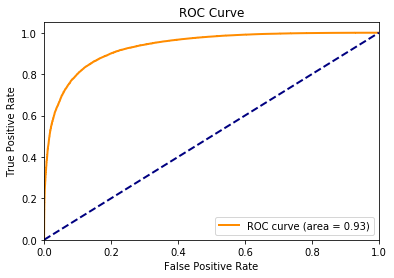

In [21]:
y_predict_probabilities = lgbmc.predict_proba(X_test_vector)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)
plot_roc_auc_curve(fpr, tpr)

### Test 

In [24]:
print(lgbmc.predict(vect.transform(['The movie is not that good, I would never see it again','The movie is not bad, I will see it again']).astype('float32')))

[1. 0.]
